<a href="https://colab.research.google.com/github/javier-jaime/House_Move/blob/main/Moving_Truck_Optimization_with_RectPack_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Moving Truck Optimization

This demo is to show the use of the ReckPack library for a typical 2D knapsack problem: "Moving Truck Optimization".

Dimensions are from a typical u-haul rental truck (excluding Mom's Attic).

### Install necessary Libraries




In [5]:
!pip install rectpack # Uncomment to install
from rectpack import newPacker
import rectpack.packer as packer
import matplotlib.pyplot as plt

  Preparing metadata (setup.py) ... done
  Created wheel for rectpack: filename=rectpack-0.2.2-py3-none-any.whl size=19333 sha256=4179c90fd4b9f881913e537ade4801023d66316e3a48611e5fca2b658f2869a9
  Stored in directory: /root/.cache/pip/wheels/c7/40/95/f04f84afcee7624b9bb02c652d8116f0ffa3653f962ce46fa3
Successfully built rectpack


### Trucks Dimensions

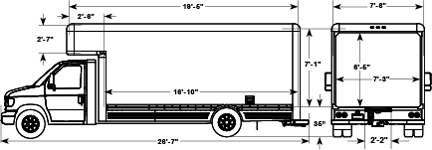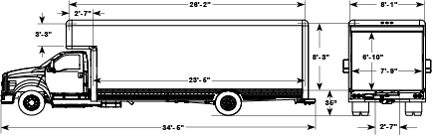

In [6]:
# Truck Interior Size (inches)

bx = 0 # Buffer x
by = 0 # Buffer y

truck20 = [(87 - bx, 202 - by)]
truck26 = [(92 - bx, 282 - by)]

### Furniture List & Dimensions

In [8]:
# Furniture Dimensions
dresser = [16.5, 60]
q_bed = [65, 90]
t_bed = [42, 77]
couch_1 = [38, 35]
couch_2 = [38, 59]
couch_3 = [38, 80]
couch_4 = [38, 87]
table = [35.3, 53]

# Furniture List

list = [dresser, q_bed, q_bed, t_bed, t_bed, couch_1, couch_2, couch_3, couch_4, table]

### Optimization Model Helper functions

In [9]:
# Function Solver
def solver(list, trucks):

    # Build the Packer
    pack = newPacker(mode = packer.PackingMode.Offline, bin_algo = packer.PackingBin.Global,
                     rotation=True)

    # Add the rectangles to packing queue
    for l in list:
        pack.add_rect(*l)

    # Add the bins where the rectangles will be placed
    for t in trucks:
        pack.add_bin(*t)

    # Start packing
    pack.pack()

    # Full rectangle list from furniture
    all_rects = pack.rect_list()

    # Furniture with dimensions
    all_furniture = [sorted([p[3], p[4]]) for p in all_rects]

    # Count number of 80 x 120
    furniture = all_furniture.count(list)
    print(furniture)

    return all_rects, all_furniture

In [10]:
def plot_solution(all_rects):
    # Plot
    plt.figure(figsize=(10,20))
    # Loop all rect
    for rect in all_rects:
        b, x, y, w, h, rid = rect
        x1, x2, x3, x4, x5 = x, x+w, x+w, x, x
        y1, y2, y3, y4, y5 = y, y, y+h, y+h,y

        plt.plot([x1,x2,x3,x4,x5],[y1,y2,y3,y4,y5])

    plt.show()

### Test 1: 20ft Truck (not stacked)

0
5 out of 10 pieces of furniture fit in the truck
Furniture Dimensions:  [[38, 87], [38, 80], [42, 77], [42, 77], [35, 38]]


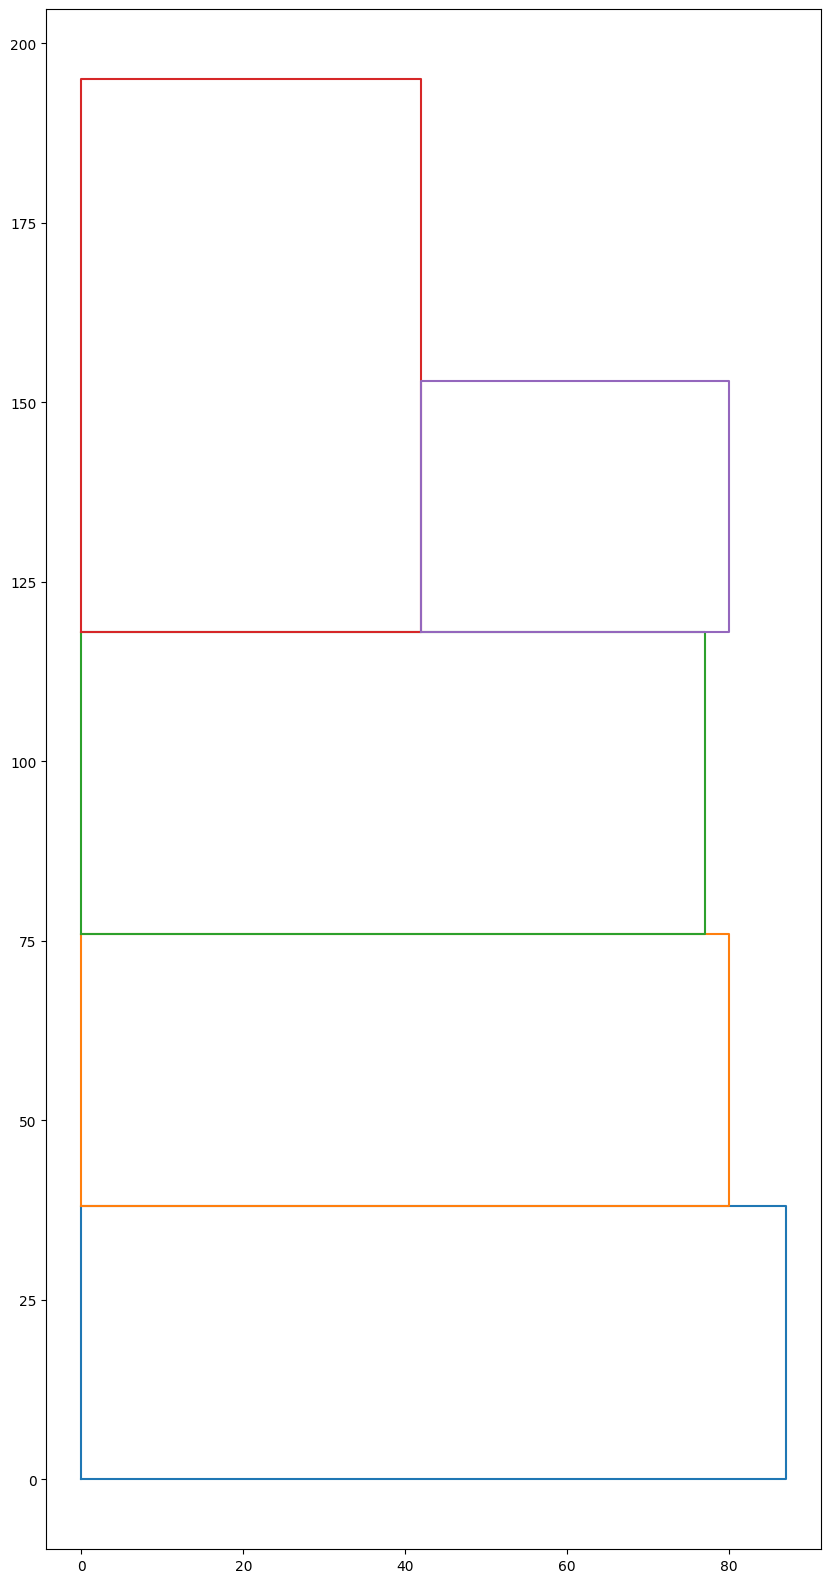

In [11]:
# Test 1 20 ft Truck

all_rects, all_furniture = solver(list, truck20)

# Count number of furniture

print( len(all_furniture), "out of", len(list), "pieces of furniture fit in the truck")

print("Furniture Dimensions: ", all_furniture)

plot_solution(all_rects)


### Test 2: 26ft Truck (not stacked)

0
6 out of 10 pieces of furniture fit in the truck
Furniture Dimensions:  [[65, 90], [65, 90], [38, 87], [38, 80], [42, 77], [16.5, 60]]


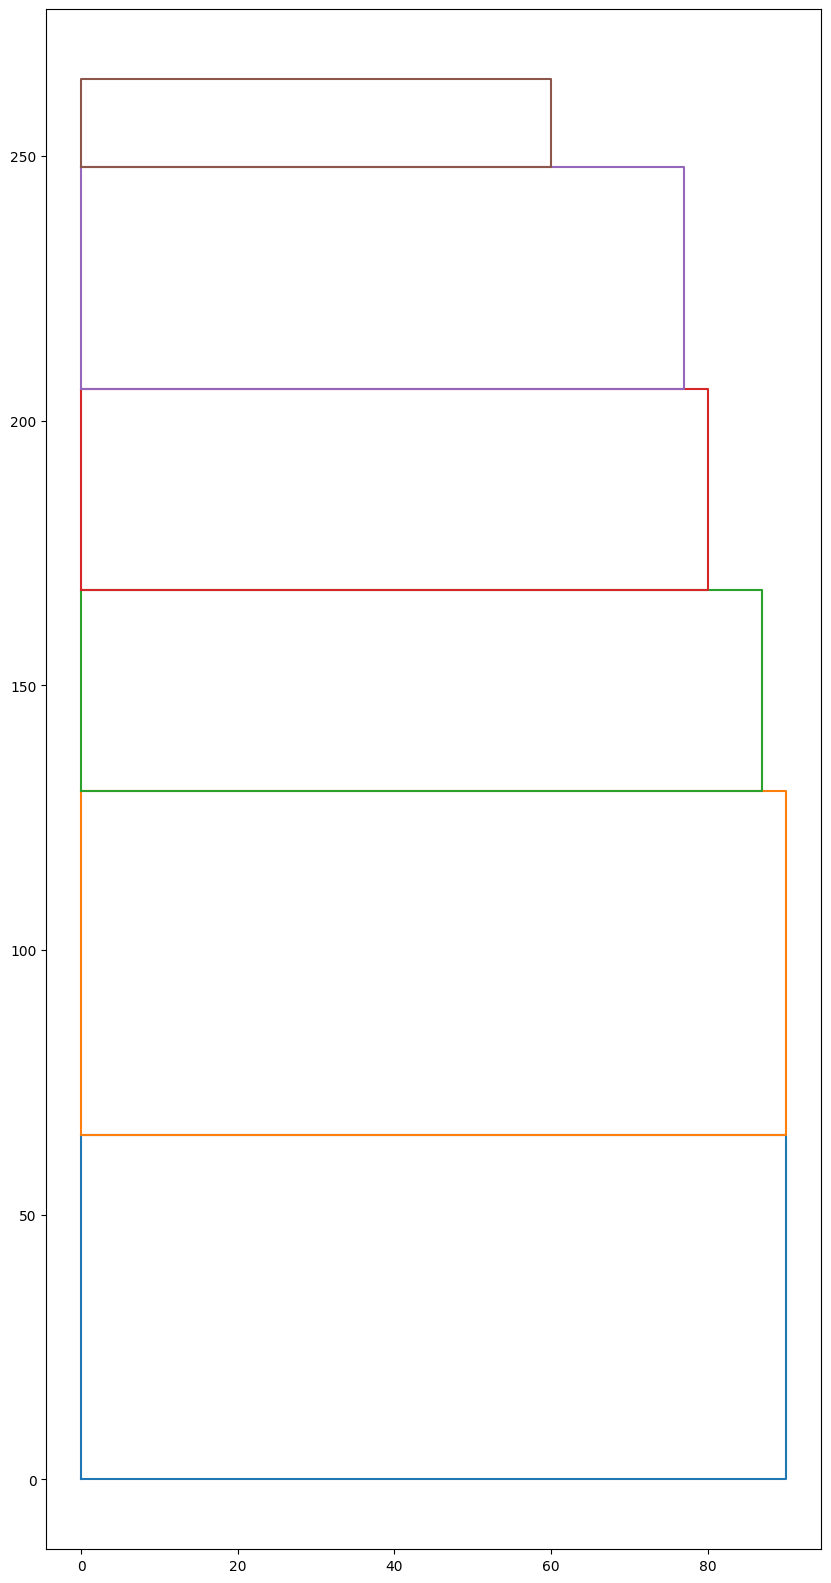

In [12]:
# Test 2 26 ft Truck

all_rects, all_furniture = solver(list, truck26)

# Count number of furniture

print( len(all_furniture), "out of", len(list), "pieces of furniture fit in the truck")

print("Furniture Dimensions: ", all_furniture)

plot_solution(all_rects)


---